In [1]:
#Author @TanmayXD

In [2]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

2022-10-18 20:34:39.169609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 20:34:39.315530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 20:34:39.315565: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 20:34:39.411298: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 20:34:40.008635: W tensorflow/stream_executor/platform/de

In [3]:
df = web.DataReader('TRX-USD', data_source= 'yahoo', start= '2010-01-01', end= '2022-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,0.002438,0.002285,0.002304,0.002344,2924350,0.002344
2017-11-10,0.002350,0.001989,0.002335,0.002013,2193620,0.002013
2017-11-11,0.002298,0.001890,0.002026,0.002003,1748460,0.002003
2017-11-12,0.002006,0.001684,0.002006,0.001783,2174370,0.001783
2017-11-13,0.002146,0.001771,0.001795,0.002112,2889150,0.002112
...,...,...,...,...,...,...
2022-10-14,0.065006,0.060825,0.061007,0.063941,698236582,0.063941
2022-10-15,0.064940,0.061819,0.063966,0.061823,476732078,0.061823
2022-10-16,0.061991,0.061284,0.061824,0.061821,300535408,0.061821


In [4]:
df.to_csv('RawData.csv')

In [5]:
df.shape

(1805, 6)

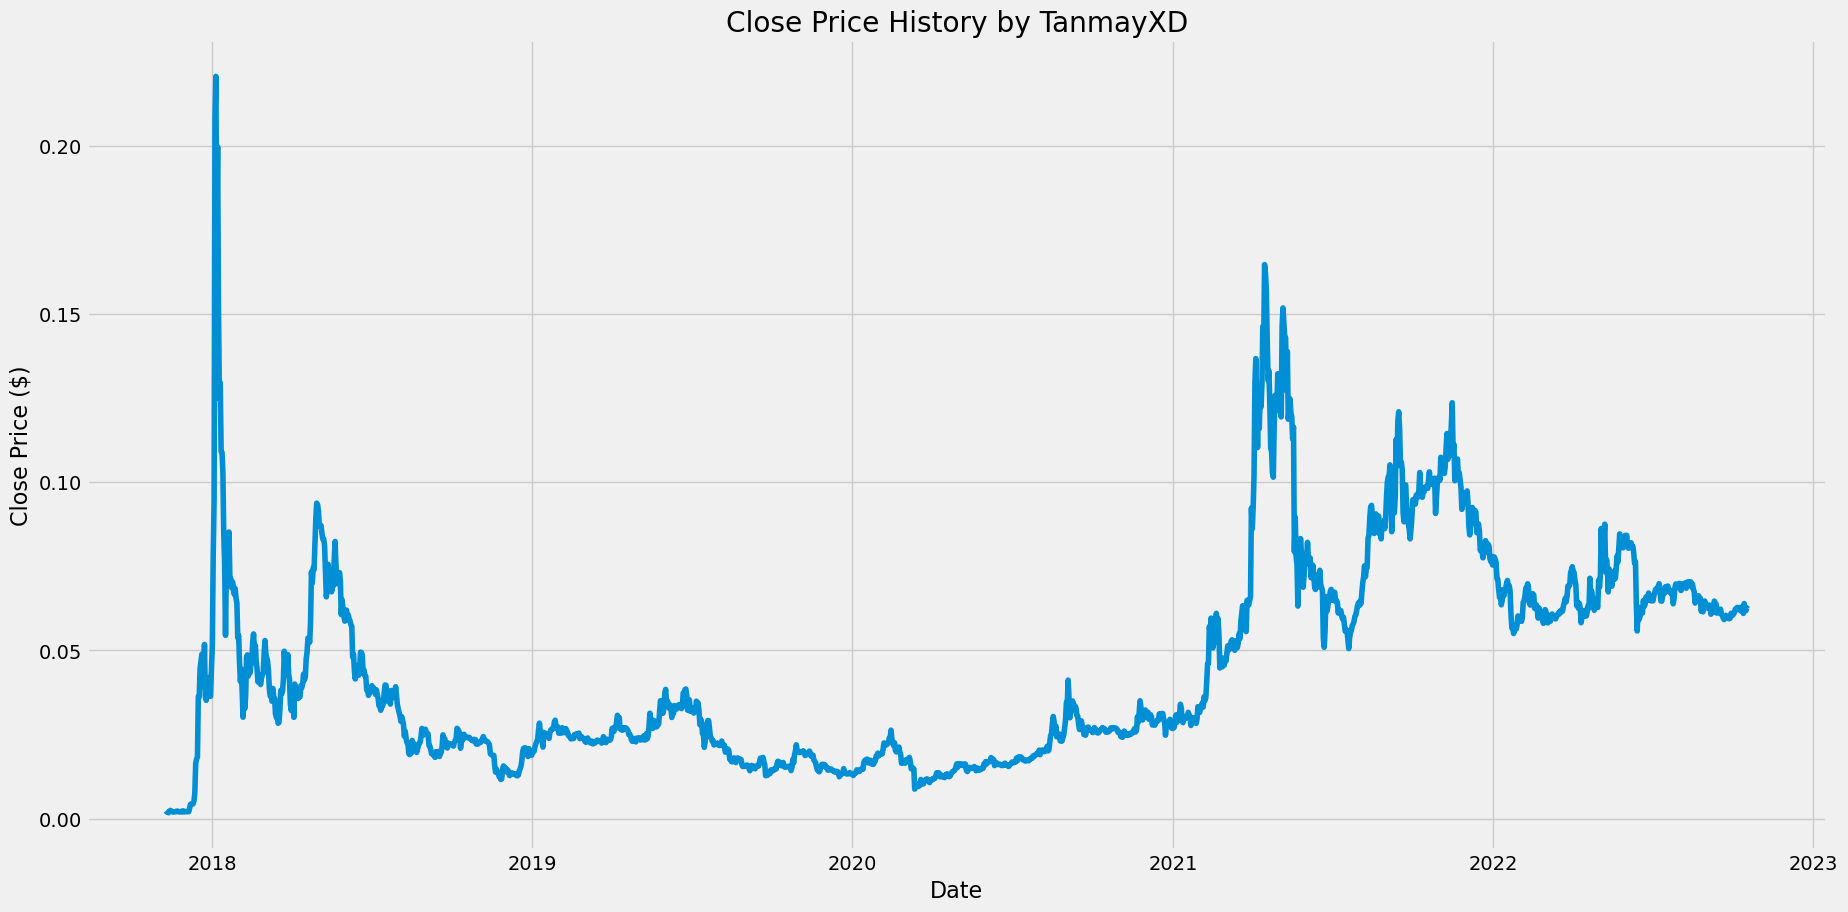

In [6]:
#Visualize the closing price
plt.figure(figsize=(20,10))
plt.title('Close Price History by TanmayXD')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price ($)', fontsize=16)
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1444

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00256431],
       [0.00105132],
       [0.00100561],
       ...,
       [0.27443183],
       [0.27828974],
       [0.2767908 ]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([2.56431346e-03, 1.05132290e-03, 1.00561286e-03, 0.00000000e+00,
       1.50384908e-03, 3.20882074e-03, 2.46375244e-03, 1.94723326e-03,
       9.18764851e-04, 1.11988795e-03, 1.00104292e-03, 1.60441010e-03,
       1.64554914e-03, 2.37233342e-03, 1.47185206e-03, 1.10617494e-03,
       1.21130697e-03, 1.62269412e-03, 1.27530102e-03, 2.39975945e-03,
       1.30272598e-03, 2.10721733e-03, 1.53127511e-03, 1.32558100e-03,
       1.52213310e-03, 1.65012014e-03, 1.38043304e-03, 5.81427270e-03,
       1.13908559e-02, 1.19348000e-02, 1.22959061e-02, 1.19987940e-02,
       1.59938216e-02, 2.66487495e-02, 6.70881107e-02, 7.27104007e-02,
       7.61112020e-02, 1.57643572e-01, 1.57273329e-01, 1.95664908e-01,
       2.05990715e-01, 2.15292634e-01, 2.01972829e-01, 1.70456006e-01,
       2.28585024e-01, 1.57360172e-01, 1.52642939e-01, 1.64778859e-01,
       1.60203318e-01, 1.83711819e-01, 1.57995545e-01, 1.58292653e-01,
       1.96409976e-01, 2.28146208e-01, 3.51502937e-01, 4.24734424e-01,
     

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1384, 60, 1)

In [12]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

2022-10-18 20:34:45.605461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-18 20:34:45.605510: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-18 20:34:45.605544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-10-18 20:34:45.605883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1384/1384 [==============================] - 30s 20ms/step - loss: 0.0020


In [15]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 10ms/step


In [19]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.007492523258577754

/tmp/ipykernel_14602/1515047228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


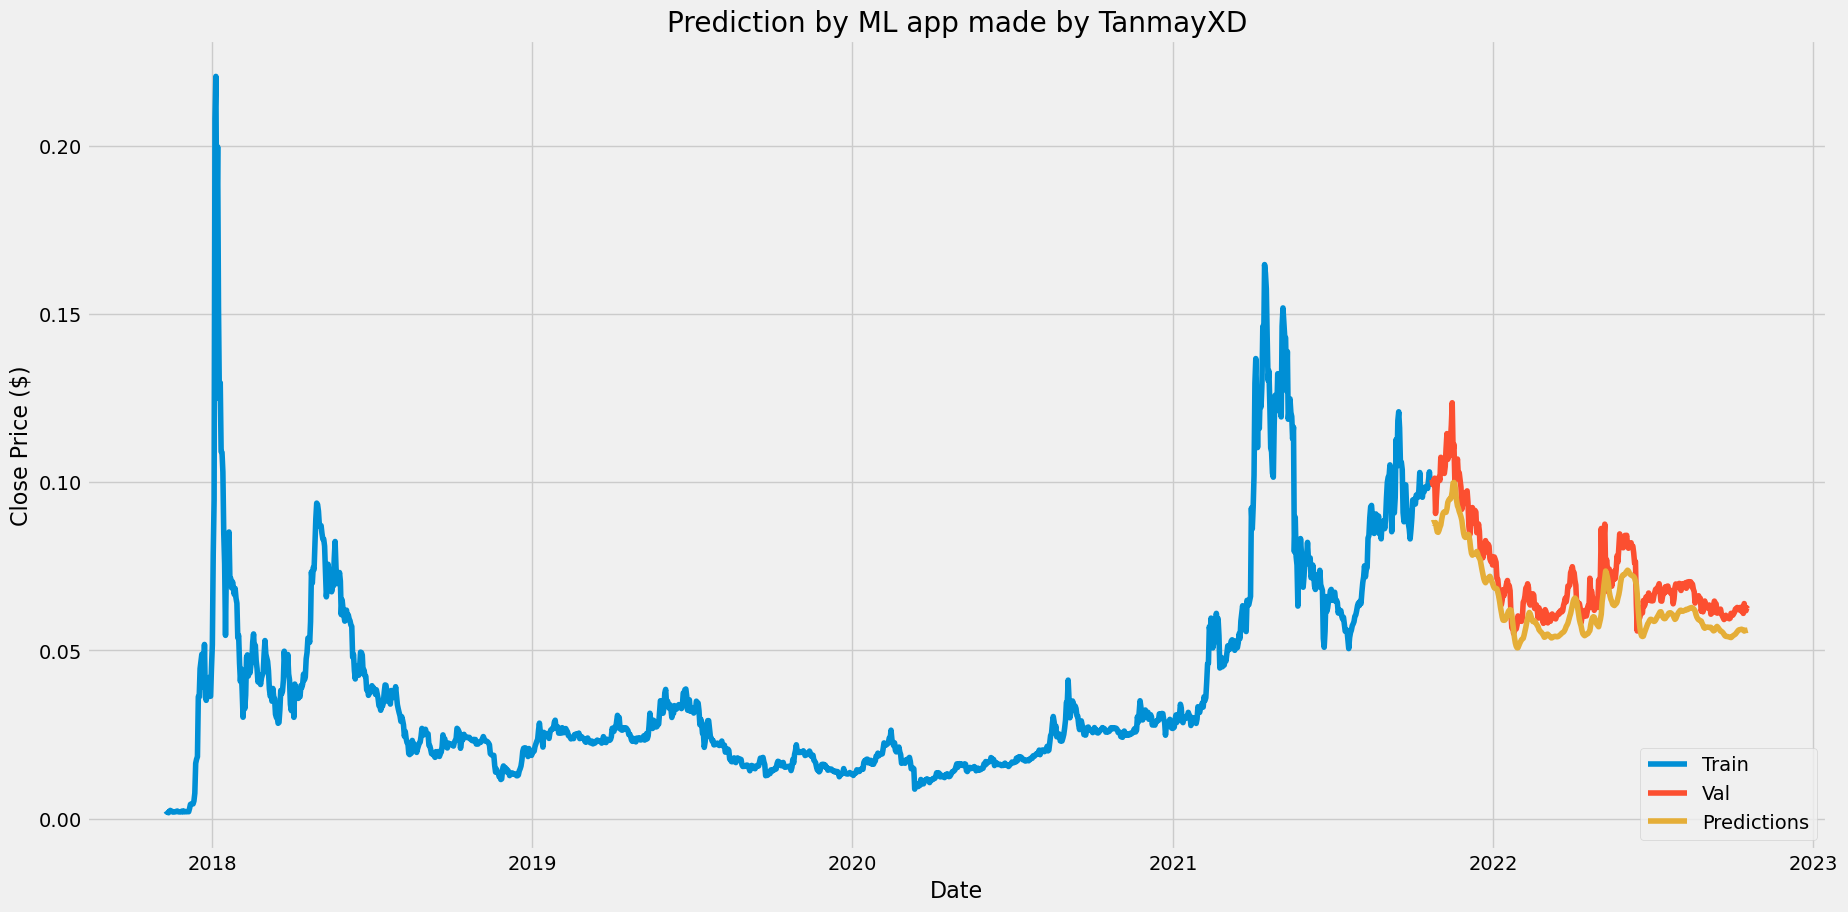

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize= (20, 10))
plt.title('Prediction by ML app made by TanmayXD')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Close Price ($)', fontsize= 16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2021-10-23,0.100740,0.087880
2021-10-24,0.099234,0.087995
2021-10-25,0.100708,0.087834
2021-10-26,0.101189,0.087849
2021-10-27,0.090706,0.088005
...,...,...
2022-10-14,0.063941,0.055764
2022-10-15,0.061823,0.055984
2022-10-16,0.061821,0.056010


In [22]:
valid.to_csv('Close_vs_Predictions.csv')